<a href="https://colab.research.google.com/github/mfnravi/ProfitPant/blob/main/AutoEncoders_as_Dimensionality_Reduction_App_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import mpl_toolkits

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Create a random dataset
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=300, n_features=2 , centers= 2 , cluster_std= 1.0, random_state = 100)

In [4]:
X,y = data

np.random.seed(seed=100)
z_noise= np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [5]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns=['X1','X2','X3']

In [6]:
feat.head()

,X1,X2,X3
0,-2.088489,6.496238,-1.749765
1,-1.013016,-4.250270,0.342680
2,-1.961320,5.757980,1.153036
3,0.245526,6.499957,-0.252436
4,-0.643589,7.686818,0.981321


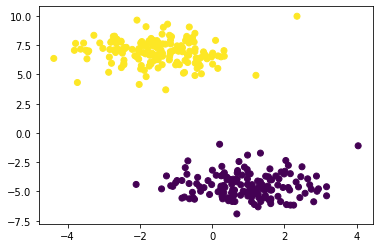

In [7]:
plt.scatter(feat['X1'],feat['X2'], c=y)

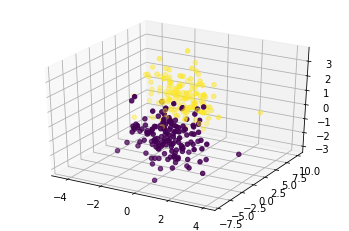

In [8]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [11]:
#Autoencoder's Encodder Component 

# Input ---> 3 columns
# Output ---> 2 cols

encoder = Sequential()
encoder.add(Dense(units=3 , activation='relu', input_shape=[3]))
encoder.add(Dense(units=2 , activation='relu'))
encoder.add(Dense(units=2 , activation='linear'))


#Autoencoder's Decoder Component

#Input --> 2 Cols
#Output --> 3 Cols

decoder = Sequential()
decoder.add(Dense(units= 3, activation='relu', input_shape=[2]))
decoder.add(Dense(units=3 , activation='relu'))
decoder.add(Dense(units=3 , activation='linear'))




# PCA Autoencoder (Which contains encoder and decoder)

pcaAutoEncoder = Sequential([encoder,decoder])
pcaAutoEncoder.compile(loss="mse", optimizer=SGD(lr=1.6) )

In [12]:
pcaAutoEncoder.fit(feat,feat, epochs=15)

Epoch 1/15
10/10 [==============================] - 1s 2ms/step - loss: 13.4258
Epoch 2/15
10/10 [==============================] - 0s 2ms/step - loss: 12.9246
Epoch 3/15
10/10 [==============================] - 0s 2ms/step - loss: 13.6325
Epoch 4/15
10/10 [==============================] - 0s 2ms/step - loss: 14.7513
Epoch 5/15
10/10 [==============================] - 0s 1ms/step - loss: 13.4894
Epoch 6/15
10/10 [==============================] - 0s 2ms/step - loss: 12.6678
Epoch 7/15
10/10 [==============================] - 0s 2ms/step - loss: 12.9281
Epoch 8/15
10/10 [==============================] - 0s 2ms/step - loss: 14.0213
Epoch 9/15
10/10 [==============================] - 0s 2ms/step - loss: 12.9929
Epoch 10/15
10/10 [==============================] - 0s 2ms/step - loss: 14.0855
Epoch 11/15
10/10 [==============================] - 0s 2ms/step - loss: 13.2319
Epoch 12/15
10/10 [==============================] - 0s 2ms/step - loss: 13.1080
Epoch 13/15
10/10 [==================

In [13]:
#Generated data 

encoded_2dim = encoder.predict(feat)
encoded_2dim

array([[ 0.51882756,  0.11027898],
       [ 0.13265494, -0.09725618],
       [ 0.63210297,  0.20771557],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.44508094,  0.04745179],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.40141568,  0.0092843 ],
       [ 0.33205527, -0.03022546],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.78225315,  0.33687088],
       [ 0.13265494, -0.09725618],
       [ 0.13265494, -0.09725618],
       [ 0.14566918, -0.1156966 ],
       [ 0.31148666,

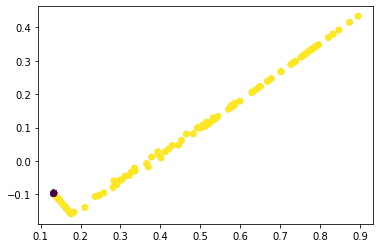

In [14]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)

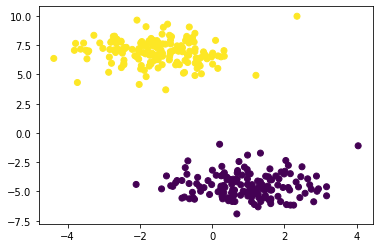

In [15]:
plt.scatter(feat['X1'],feat['X2'], c=y)

In [16]:
decodedData = decoder.predict(encoded_2dim)
decodedData

array([[-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.01321599],
       [-0.19578162, -0.48978597, -0.013

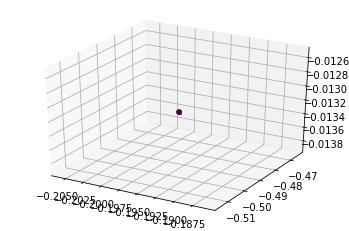

In [17]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(decodedData[:,0],decodedData[:,1],decodedData[:,2],c=y)